In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
from sklearn.tree import  DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import LocalOutlierFactor
import sklearn.metrics as metrics
from sklearn.metrics import accuracy_score

In [ ]:
df = pd.read_csv('diabetic_data.csv')
df.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


preprocessing

In [ ]:
#checking the shape of dataset
df.shape

(101766, 50)

In [ ]:
df.dtypes

encounter_id                 int64
patient_nbr                  int64
race                        object
gender                      object
age                         object
weight                      object
admission_type_id            int64
discharge_disposition_id     int64
admission_source_id          int64
time_in_hospital             int64
payer_code                  object
medical_specialty           object
num_lab_procedures           int64
num_procedures               int64
num_medications              int64
number_outpatient            int64
number_emergency             int64
number_inpatient             int64
diag_1                      object
diag_2                      object
diag_3                      object
number_diagnoses             int64
max_glu_serum               object
A1Cresult                   object
metformin                   object
repaglinide                 object
nateglinide                 object
chlorpropamide              object
glimepiride         

In [ ]:
#Checking for missing values in dataset
#In the dataset missing values are represented as '?' sign
for col in df.columns:
    if df[col].dtype == object:
         print(col,df[col][df[col] == '?'].count())

race 2273
gender 0
age 0
weight 98569
payer_code 40256
medical_specialty 49949
diag_1 21
diag_2 358
diag_3 1423
max_glu_serum 0
A1Cresult 0
metformin 0
repaglinide 0
nateglinide 0
chlorpropamide 0
glimepiride 0
acetohexamide 0
glipizide 0
glyburide 0
tolbutamide 0
pioglitazone 0
rosiglitazone 0
acarbose 0
miglitol 0
troglitazone 0
tolazamide 0
examide 0
citoglipton 0
insulin 0
glyburide-metformin 0
glipizide-metformin 0
glimepiride-pioglitazone 0
metformin-rosiglitazone 0
metformin-pioglitazone 0
change 0
diabetesMed 0
readmitted 0


In [ ]:
# gender was coded differently so we use a custom count for this one
print('gender', df['gender'][df['gender'] == 'Unknown/Invalid'].count())

gender 3


Variable weight contains approximate 98% of the missing values so there is no significance in filling those missing values so we decided to drop these variables. Variable Payer code and medical specialty contains approximate 40% missing values so we also dropped these variables. Variables race, diag_1, diag_2, diag_3 and gender contains very less missing values as compared to other attributes which we dropped so for these attributes we also decided to drop those where missing values contains

In [ ]:
#dropping columns with large number of missing values
df = df.drop(['weight','payer_code','medical_specialty'], axis = 1)

In [ ]:
drop_Idx = set(df[(df['diag_1'] == '?') & (df['diag_2'] == '?') & (df['diag_3'] == '?')].index)

drop_Idx = drop_Idx.union(set(df['diag_1'][df['diag_1'] == '?'].index))
drop_Idx = drop_Idx.union(set(df['diag_2'][df['diag_2'] == '?'].index))
drop_Idx = drop_Idx.union(set(df['diag_3'][df['diag_3'] == '?'].index))
drop_Idx = drop_Idx.union(set(df['race'][df['race'] == '?'].index))
drop_Idx = drop_Idx.union(set(df[df['discharge_disposition_id'] == 11].index))
drop_Idx = drop_Idx.union(set(df['gender'][df['gender'] == 'Unknown/Invalid'].index))
new_Idx = list(set(df.index) - set(drop_Idx))
df = df.iloc[new_Idx]

variables (drugs named citoglipton and examide), all records have the same value. So essentially these cannot provide any interpretive or discriminatory information for predicting readmission so we decided to drop these two variables

In [ ]:
df = df.drop(['citoglipton', 'examide'], axis = 1)

In [ ]:
#Checking for missing values in the data
for col in df.columns:
    if df[col].dtype == object:
         print(col,df[col][df[col] == '?'].count())

print('gender', df['gender'][df['gender'] == 'Unknown/Invalid'].count())

race 0
gender 0
age 0
diag_1 0
diag_2 0
diag_3 0
max_glu_serum 0
A1Cresult 0
metformin 0
repaglinide 0
nateglinide 0
chlorpropamide 0
glimepiride 0
acetohexamide 0
glipizide 0
glyburide 0
tolbutamide 0
pioglitazone 0
rosiglitazone 0
acarbose 0
miglitol 0
troglitazone 0
tolazamide 0
insulin 0
glyburide-metformin 0
glipizide-metformin 0
glimepiride-pioglitazone 0
metformin-rosiglitazone 0
metformin-pioglitazone 0
change 0
diabetesMed 0
readmitted 0
gender 0


Feature Engineering

This is highly subjective, and partly depends on a knowledge of health care services, and making sense of the potential relationships between features. There are perhaps thousands of ways to try here. We tried some...

Service utilization: The data contains variables for number of inpatient (admissions), emergency room visits and outpatient visits for a given patient in the previous one year. These are (crude) measures of how much hospital/clinic services a person has used in the past year. We added these three to create a new variable called service utilization (see figure below). The idea was to see which version gives us better results. Granted, we did not apply any special weighting to the three ingredients of service utilization but we wanted to try something simple at this stage.

In [ ]:
df['service_utilization'] = df['number_outpatient'] + df['number_emergency'] + df['number_inpatient']

Number of medication changes: The dataset contains 23 features for 23 drugs (or combos) which indicate for each of these, whether a change in that medication was made or not during the current hospital stay of patient. Medication change for diabetics upon admission has been shown by previous research to be associated with lower readmission rates. We decided to count how many changes were made in total for each patient, and declared that a new feature. The reasoning here was to both simplify the model and possibly discover a relationship with number of changes regardless of which drug was changed.

In [ ]:
keys = ['metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride', 'glipizide', 'glyburide', 'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'insulin', 'glyburide-metformin', 'tolazamide', 'metformin-pioglitazone','metformin-rosiglitazone', 'glimepiride-pioglitazone', 'glipizide-metformin', 'troglitazone', 'tolbutamide', 'acetohexamide']
for col in keys:
    colname = str(col) + 'temp'
    df[colname] = df[col].apply(lambda x: 0 if (x == 'No' or x == 'Steady') else 1)
df['numchange'] = 0
for col in keys:
    colname = str(col) + 'temp'
    df['numchange'] = df['numchange'] + df[colname]
    del df[colname]

df['numchange'].value_counts()

0    70142
1    24922
2     1271
3      106
4        5
Name: numchange, dtype: int64

In [ ]:
# re-encoding admission type, discharge type and admission source into fewer categories
# Define mapping dictionaries
admission_type_mapping = {2: 1, 7: 1, 6: 5, 8: 5}
discharge_disposition_mapping = {6: 1, 8: 1, 9: 1, 13: 1, 3: 2, 4: 2, 5: 2, 14: 2, 22: 2, 23: 2, 24: 2, 12: 10, 15: 10, 16: 10, 17: 10, 25: 18, 26: 18}
admission_source_mapping = {2: 1, 3: 1, 5: 4, 6: 4, 10: 4, 22: 4, 25: 4, 15: 9, 17: 9, 20: 9, 21: 9, 13: 11, 14: 11}

# Apply mappings to columns
df['admission_type_id'] = df['admission_type_id'].replace(admission_type_mapping)
df['discharge_disposition_id'] = df['discharge_disposition_id'].replace(discharge_disposition_mapping)
df['admission_source_id'] = df['admission_source_id'].replace(admission_source_mapping)

Encoding some variables: The original dataset used string values for gender, race, medication change, and each of the 23 drugs used. To better fit those variables into our model, we interpret the variables to numeric binary variables to reflect their nature. For example, we encoded the “ medication change ” feature from “No” (no change) and “Ch” (changed) into 0 and 1.

In [ ]:
df['change'] = df['change'].replace('Ch', 1)
df['change'] = df['change'].replace('No', 0)
df['gender'] = df['gender'].replace('Male', 1)
df['gender'] = df['gender'].replace('Female', 0)
df['diabetesMed'] = df['diabetesMed'].replace('Yes', 1)
df['diabetesMed'] = df['diabetesMed'].replace('No', 0)
# keys is the same as before
for col in keys:
    df[col] = df[col].replace('No', 0)
    df[col] = df[col].replace('Steady', 1)
    df[col] = df[col].replace('Up', 1)
    df[col] = df[col].replace('Down', 1)

We also reduced both A1C test result and Glucose serum test result into categories of Normal, Abnormal and Not tested.

In [ ]:
df['A1Cresult'] = df['A1Cresult'].replace('>7', 1)
df['A1Cresult'] = df['A1Cresult'].replace('>8', 1)
df['A1Cresult'] = df['A1Cresult'].replace('Norm', 0)
df['A1Cresult'] = df['A1Cresult'].replace('None', -99)
df['max_glu_serum'] = df['max_glu_serum'].replace('>200', 1)
df['max_glu_serum'] = df['max_glu_serum'].replace('>300', 1)
df['max_glu_serum'] = df['max_glu_serum'].replace('Norm', 0)
df['max_glu_serum'] = df['max_glu_serum'].replace('None', -99)

Dealing with age: There are different ways to deal with this. The dataset only gives us age as 10 year categories, so we don’t know the exact age of each patient. The previous study on this dataset used age categories as nominal variables, but we wanted to be able to see the effect of increasing age on readmission, even if in a crude way. To do that, we assume that age of the patient on average lies at the midpoint of the age category. For example, if the patient’s age category is 20–30 years, then we assume the age = 25 years. So we converted age categories to midpoints, resulting in a numeric variable:

In [ ]:
# code age intervals [0-10) - [90-100) from 1-10
for i in range(0,10):
    df['age'] = df['age'].replace('['+str(10*i)+'-'+str(10*(i+1))+')', i+1)
df['age'].value_counts()

8     24815
7     21521
6     16546
9     16223
5      9208
4      3538
10     2594
3      1471
2       466
1        64
Name: age, dtype: int64

Collapsing of Multiple Encounters for same patient Some patients in the dataset had more than one encounter.We could not count them as independent encounters because that bias the results towards those patients who had multiple encounters. Thus we tried multiple techniques to collapse and consolidate multiple encounters for same patient such as:

Considering more than 2 readmissions across multiple encounters as readmission for collapsed record.
Considering average stay at hospital across multiple encounters.
Considering the percentage of the medication changes across multiple encounters
Considering the total number of the encounters to replace the encounter unique ID
Considering the combination of diagnoses across multiple encounters as a list However, taking the features such as “diagnosis”, for instance, we did not find it not meaningful to combine multiple categorical values into an array for building data model. We then considered first encounter and last encounter separately as possible representations of multiple encounters. However, last encounters gave extremely imbalanced data for readmissions (96/4 Readmissions vs No Readmissions) and thus, we decided to use first encounters of patients with multiple encounters. This resulted in dataset being reduced to about 70,000 encounters:

In [ ]:
df2 = df.drop_duplicates(subset= ['patient_nbr'], keep = 'first')
df2.shape
(70442, 55)

(70442, 55)

In [ ]:
df.head().T

,1,2,3,4,5
encounter_id,149190,64410,500364,16680,35754
patient_nbr,55629189,86047875,82442376,42519267,82637451
race,Caucasian,AfricanAmerican,Caucasian,Caucasian,Caucasian
gender,0,0,1,1,1
age,2,3,4,5,6
admission_type_id,1,1,1,1,1
discharge_disposition_id,1,1,1,1,1
admission_source_id,7,7,7,7,1
time_in_hospital,3,2,2,1,3
num_lab_procedures,59,11,44,51,31


Encoding the outcome variable: The outcome we are looking at is whether the patient gets readmitted to the hospital within 30 days or not. The variable actually has < 30, > 30 and No Readmission categories. To reduce our problem to a binary classification, we combined the readmission after 30 days and no readmission into a single category:

In [ ]:
df['readmitted'].value_counts()

NO     50731
>30    34649
<30    11066
Name: readmitted, dtype: int64

In [ ]:
readmitted_mapping = {'>30': 0, '<30': 1, 'NO': 0}
df['readmitted'] = df['readmitted'].map(readmitted_mapping)

Categorization of diagnoses: The dataset contained up to three diagnoses for a given patient (primary, secondary and additional). However, each of these had 700–900 unique ICD codes and it is extremely difficult to include them in the model and interpret meaningfully. Therefore, we collapsed these diagnosis codes into 9 disease categories in an almost similar fashion to that done in the original publication using this dataset. These 9 categories include Circulatory, Respiratory, Digestive, Diabetes, Injury, Musculoskeletal, Genitourinary, Neoplasms, and Others. Although we did this for primary, secondary and additional diagnoses, we eventually decided to use only the primary diagnosis in our model. Doing this in python was slightly cumbersome because, well, we are mapping the disease codes to certain category names. Below code should demonstrate this easily.

In [ ]:
# Creating additional columns for diagnosis# Creati
df['level1_diag1'] = df['diag_1']
df['level2_diag1'] = df['diag_1']
df['level1_diag2'] = df['diag_2']
df['level2_diag2'] = df['diag_2']
df['level1_diag3'] = df['diag_3']
df['level2_diag3'] = df['diag_3']

In [ ]:
# Replace 'V' and 'E' with 0 in level1_diag and level2_diag columns
for col_prefix in ['level1_diag', 'level2_diag']:
    for diag_col in ['diag_1', 'diag_2', 'diag_3']:
        mask = df[diag_col].str.contains('V|E')
        df[col_prefix + diag_col[-1]] = np.where(mask, 0, df[col_prefix + diag_col[-1]])

# Replace '?' with -1 in level1_diag and level2_diag columns
for col_prefix in ['level1_diag', 'level2_diag']:
    for diag_num in ['1', '2', '3']:
        df[col_prefix + diag_num] = df[col_prefix + diag_num].replace('?', -1)


In [ ]:
df['level1_diag1'] = df['level1_diag1'].astype(float)
df['level2_diag1'] = df['level2_diag1'].astype(float)
df['level1_diag2'] = df['level1_diag2'].astype(float)
df['level2_diag2'] = df['level2_diag2'].astype(float)
df['level1_diag3'] = df['level1_diag3'].astype(float)
df['level2_diag3'] = df['level2_diag3'].astype(float)

In [ ]:
import numpy as np

def map_diagnosis_code(value):
    if 390 <= value < 460 or np.floor(value) == 785:
        return 1
    elif 460 <= value < 520 or np.floor(value) == 786:
        return 2
    elif 520 <= value < 580 or np.floor(value) == 787:
        return 3
    elif np.floor(value) == 250:
        return 4
    elif 800 <= value < 1000:
        return 5
    elif 710 <= value < 740:
        return 6
    elif 580 <= value < 630 or np.floor(value) == 788:
        return 7
    elif 140 <= value < 240:
        return 8
    else:
        return 0

# Apply the mapping function to each level1_diag column
for diag_col in ['level1_diag1', 'level1_diag2', 'level1_diag3']:
    df[diag_col] = df[diag_col].apply(map_diagnosis_code)


In [ ]:
import numpy as np

def map_level2_diag(value):
    if 390 <= value < 399:
        return 1
    elif 401 <= value < 415:
        return 2
    elif 415 <= value < 460:
        return 3
    elif np.floor(value) == 785:
        return 4
    elif 460 <= value < 489:
        return 5
    elif 490 <= value < 497:
        return 6
    elif 500 <= value < 520:
        return 7
    elif np.floor(value) == 786:
        return 8
    elif 520 <= value < 530:
        return 9
    elif 530 <= value < 544:
        return 10
    elif 550 <= value < 554:
        return 11
    elif 555 <= value < 580:
        return 12
    elif np.floor(value) == 787:
        return 13
    elif np.floor(value) == 250:
        return 14
    elif 800 <= value < 1000:
        return 15
    elif 710 <= value < 740:
        return 16
    elif 580 <= value < 630:
        return 17
    elif np.floor(value) == 788:
        return 18
    elif 140 <= value < 240:
        return 19
    elif 240 <= value < 280 and (np.floor(value) != 250):
        return 20
    elif 680 <= value < 710 or np.floor(value) == 782:
        return 21
    elif 290 <= value < 320:
        return 22
    else:
        return 0

# Apply the mapping function to each level2_diag column
for diag_col in ['level2_diag1', 'level2_diag2', 'level2_diag3']:
    df[diag_col] = df[diag_col].apply(map_level2_diag)


data exploration

Text(0.5, 1.0, 'Distrinution of Readmission')

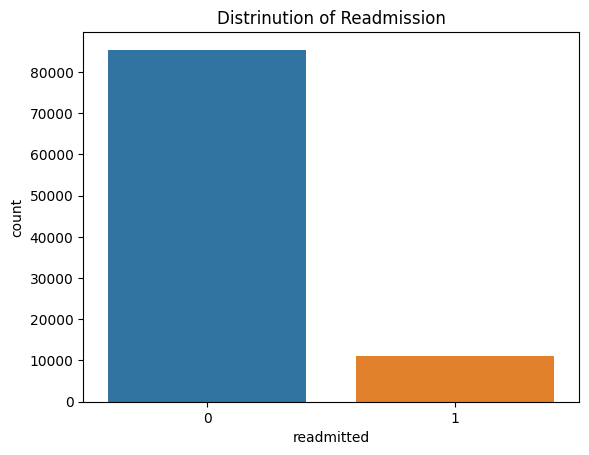

In [ ]:
# Distribution of Readmission
sns.countplot(x=df['readmitted']).set_title('Distrinution of Readmission')

Data Preprocessing

This code converts age as categorical variable to a continuous approximation by assuming mid-point of each age-category as the actual age value. This is done to avoid having to deal with age as a dummy variable in the models which makes interpretation very cumbersome. Also, since age category is not purely nominal but ordinal, we do not want to lose that information by treating it as a simple categorical variable

In [ ]:
df['age'] = df['age'].astype('int64')
print(df.age.value_counts())
# convert age categories to mid-point values
age_dict = {1:5, 2:15, 3:25, 4:35, 5:45, 6:55, 7:65, 8:75, 9:85, 10:95}
df['age'] = df.age.map(age_dict)
print(df.age.value_counts())

8     24815
7     21521
6     16546
9     16223
5      9208
4      3538
10     2594
3      1471
2       466
1        64
Name: age, dtype: int64
75    24815
65    21521
55    16546
85    16223
45     9208
35     3538
95     2594
25     1471
15      466
5        64
Name: age, dtype: int64


In [ ]:
# convert data type of nominal features in dataframe to 'object' type
i = ['encounter_id', 'patient_nbr', 'gender', 'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
          'A1Cresult', 'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride', 'acetohexamide',
          'glipizide', 'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose','miglitol',
          'troglitazone', 'tolazamide', 'insulin', 'glyburide-metformin', 'glipizide-metformin',
          'glimepiride-pioglitazone', 'metformin-rosiglitazone', 'metformin-pioglitazone', 'change', 'diabetesMed',
          'age', 'A1Cresult', 'max_glu_serum', 'level1_diag1', 'level1_diag2', 'level1_diag3', 'level2_diag1', 'level2_diag2', 'level2_diag3']


for col in i:
  df[col]= df[col].astype('object')


In [ ]:
df.dtypes

encounter_id                object
patient_nbr                 object
race                        object
gender                      object
age                         object
admission_type_id           object
discharge_disposition_id    object
admission_source_id         object
time_in_hospital             int64
num_lab_procedures           int64
num_procedures               int64
num_medications              int64
number_outpatient            int64
number_emergency             int64
number_inpatient             int64
diag_1                      object
diag_2                      object
diag_3                      object
number_diagnoses             int64
max_glu_serum               object
A1Cresult                   object
metformin                   object
repaglinide                 object
nateglinide                 object
chlorpropamide              object
glimepiride                 object
acetohexamide               object
glipizide                   object
glyburide           

Number of medication used: Another possibly related factor could be the total number of medications used by the patient (which may indicate severity of their condition and/or the intensity of care). So we created another feature by counting the medications used during the encounter (keys variable in code below is continued from above):

In [ ]:
df['nummed'] = 0

for col in keys:
    df['nummed'] = df['nummed'] + df[col]
df['nummed'].value_counts()

1    44589
0    22156
2    20901
3     7448
4     1290
5       57
6        5
Name: nummed, dtype: int64

In [ ]:
# get list of only numeric features
num_col = list(set(list(df._get_numeric_data().columns))- {'readmitted'})
num_col

['num_procedures',
 'number_inpatient',
 'num_lab_procedures',
 'time_in_hospital',
 'number_outpatient',
 'number_emergency',
 'num_medications',
 'number_diagnoses',
 'service_utilization',
 'numchange']

In [ ]:
# Removing skewnewss and kurtosis using log transformation if it is above a threshold value -  2

statdataframe = pd.DataFrame()
statdataframe['numeric_column'] = num_col
skew_before = []
skew_after = []

kurt_before = []
kurt_after = []

standard_deviation_before = []
standard_deviation_after = []

log_transform_needed = []

log_type = []

for i in num_col:
    skewval = df[i].skew()
    skew_before.append(skewval)

    kurtval = df[i].kurtosis()
    kurt_before.append(kurtval)

    sdval = df[i].std()
    standard_deviation_before.append(sdval)

    if (abs(skewval) >2) & (abs(kurtval) >2):
        log_transform_needed.append('Yes')

        if len(df[df[i] == 0])/len(df) <=0.02:
            log_type.append('log')
            skewvalnew = np.log(pd.DataFrame(df[train_data[i] > 0])[i]).skew()
            skew_after.append(skewvalnew)

            kurtvalnew = np.log(pd.DataFrame(df[train_data[i] > 0])[i]).kurtosis()
            kurt_after.append(kurtvalnew)

            sdvalnew = np.log(pd.DataFrame(df[train_data[i] > 0])[i]).std()
            standard_deviation_after.append(sdvalnew)

        else:
            log_type.append('log1p')
            skewvalnew = np.log1p(pd.DataFrame(df[df[i] >= 0])[i]).skew()
            skew_after.append(skewvalnew)

            kurtvalnew = np.log1p(pd.DataFrame(df[df[i] >= 0])[i]).kurtosis()
            kurt_after.append(kurtvalnew)

            sdvalnew = np.log1p(pd.DataFrame(df[df[i] >= 0])[i]).std()
            standard_deviation_after.append(sdvalnew)

    else:
        log_type.append('NA')
        log_transform_needed.append('No')

        skew_after.append(skewval)
        kurt_after.append(kurtval)
        standard_deviation_after.append(sdval)

statdataframe['skew_before'] = skew_before
statdataframe['kurtosis_before'] = kurt_before
statdataframe['standard_deviation_before'] = standard_deviation_before
statdataframe['log_transform_needed'] = log_transform_needed
statdataframe['log_type'] = log_type
statdataframe['skew_after'] = skew_after
statdataframe['kurtosis_after'] = kurt_after
statdataframe['standard_deviation_after'] = standard_deviation_after

In [ ]:
statdataframe

,numeric_column,skew_before,kurtosis_before,standard_deviation_before,log_transform_needed,log_type,skew_after,kurtosis_after,standard_deviation_after
0,num_procedures,1.313236,0.856100,1.703183,No,NA,1.313236,0.856100,1.703183
1,number_inpatient,3.566269,20.044813,1.269975,Yes,log1p,1.425127,1.319186,0.513389
2,num_lab_procedures,-0.240626,-0.253275,19.656782,No,NA,-0.240626,-0.253275,19.656782
3,time_in_hospital,1.127510,0.839050,2.982330,No,NA,1.127510,0.839050,2.982330
4,number_outpatient,8.767489,146.244961,1.280061,Yes,log1p,2.708627,7.648535,0.432949
5,number_emergency,22.695921,1165.140400,0.948089,Yes,log1p,3.614471,15.854105,0.318742
6,num_medications,1.339187,3.549325,8.072516,No,NA,1.339187,3.549325,8.072516
7,number_diagnoses,-0.807741,-0.372558,1.836659,No,NA,-0.807741,-0.372558,1.836659
8,service_utilization,5.312374,67.194018,2.315789,Yes,log1p,1.097244,0.497241,0.665656
9,numchange,1.426548,1.451898,0.488614,No,NA,1.426548,1.451898,0.488614


In [ ]:
# performing the log transformation for the columns determined to be needing it above.

for i in range(len(statdataframe)):
    if statdataframe['log_transform_needed'][i] == 'Yes':
        colname = str(statdataframe['numeric_column'][i])

        if statdataframe['log_type'][i] == 'log':
            df = df[df[colname] > 0]
            df[colname + "_log"] = np.log(df[colname])

        elif statdataframe['log_type'][i] == 'log1p':
            df = df[df[colname] >= 0]
            df[colname + "_log1p"] = np.log1p(df[colname])

In [ ]:
df = df.drop(['number_outpatient', 'number_inpatient', 'number_emergency','service_utilization'], axis = 1)

In [ ]:
df.shape


(96446, 54)

In [ ]:
# get list of only numeric features
numerics = list(set(list(df._get_numeric_data().columns))- {'readmitted'})
numerics

['num_procedures',
 'number_outpatient_log1p',
 'num_lab_procedures',
 'number_emergency_log1p',
 'time_in_hospital',
 'service_utilization_log1p',
 'num_medications',
 'number_inpatient_log1p',
 'number_diagnoses',
 'numchange']

In [ ]:
# show list of features that are categorical
df.encounter_id = df.encounter_id.astype('int64')
df.patient_nbr = df.patient_nbr.astype('int64')
df.diabetesMed = df.diabetesMed.astype('int64')
df.change = df.change.astype('int64')

# convert data type of nominal features in dataframe to 'object' type for aggregating
i = ['metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride', 'acetohexamide', \
          'glipizide', 'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose','miglitol', \
          'troglitazone', 'tolazamide', 'insulin', 'glyburide-metformin', 'glipizide-metformin', \
          'glimepiride-pioglitazone', 'metformin-rosiglitazone', 'metformin-pioglitazone','A1Cresult']
df[i] = df[i].astype('int64')

df.dtypes

encounter_id                   int64
patient_nbr                    int64
race                          object
gender                        object
age                           object
admission_type_id             object
discharge_disposition_id      object
admission_source_id           object
time_in_hospital               int64
num_lab_procedures             int64
num_procedures                 int64
num_medications                int64
diag_1                        object
diag_2                        object
diag_3                        object
number_diagnoses               int64
max_glu_serum                 object
A1Cresult                      int64
metformin                      int64
repaglinide                    int64
nateglinide                    int64
chlorpropamide                 int64
glimepiride                    int64
acetohexamide                  int64
glipizide                      int64
glyburide                      int64
tolbutamide                    int64
p

In [ ]:
dfcopy = df.copy(deep = True)

In [ ]:
df['readmitted'] = df['readmitted'].apply(lambda x: 0 if x == 2 else x)

In [ ]:
# drop individual diagnosis columns that have too granular disease information
# also drop level 2 categorization (which was not comparable with any reference)
# also drop level 1 secondary and tertiary diagnoses
df.drop(['diag_1', 'diag_2', 'diag_3', 'level2_diag1', 'level1_diag2', 'level2_diag2', 'level1_diag3',
         'level2_diag3'], axis=1, inplace=True)

In [ ]:
interactionterms = [('num_medications','time_in_hospital'),
('num_medications','num_procedures'),
('time_in_hospital','num_lab_procedures'),
('num_medications','num_lab_procedures'),
('num_medications','number_diagnoses'),
('age','number_diagnoses'),
('change','num_medications'),
('number_diagnoses','time_in_hospital'),
('num_medications','numchange')]

In [ ]:
for inter in interactionterms:
    name = inter[0] + '|' + inter[1]
    df[name] = df[inter[0]] * df[inter[1]]

In [ ]:
df[['num_medications','time_in_hospital', 'num_medications|time_in_hospital']].head()

,num_medications,time_in_hospital,num_medications|time_in_hospital
1,18,3,54
2,13,2,26
3,16,2,32
4,8,1,8
5,16,3,48


In [ ]:
# Feature Scaling
datf = pd.DataFrame()
stats = df[numerics].describe().loc[['mean', 'std']]
datf['features'] = stats.columns
datf['std_dev'] = stats.loc['std'].values
datf['mean'] = stats.loc['mean'].values


In [ ]:
# dropping multiple encounters while keeping either first or last encounter of these patients
df2 = df.drop_duplicates(subset= ['patient_nbr'], keep = 'first')
df2.shape

(67580, 55)

In [ ]:
# standardize function
def standardize(raw_data):
    return ((raw_data - np.mean(raw_data, axis = 0)) / np.std(raw_data, axis = 0))

In [ ]:
df2[numerics] = standardize(df2[numerics])
import scipy as sp
df2 = df2[(np.abs(sp.stats.zscore(df2[numerics])) < 3).all(axis=1)]

<ipython-input-58-d878bd60c0ea>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2[numerics] = standardize(df2[numerics])


In [ ]:
from matplotlib.colors import ListedColormap
my_cmap = ListedColormap(sns.light_palette((250, 100, 50), input="husl", n_colors=50).as_hex())
table = df2.drop(['patient_nbr', 'encounter_id'], axis=1).corr(method='pearson')
table.style.background_gradient(cmap=my_cmap, axis = 0)

<ipython-input-59-e0e8b8383330>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  table = df2.drop(['patient_nbr', 'encounter_id'], axis=1).corr(method='pearson')
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/style.py:3931: RuntimeWarning: All-NaN slice encountered
  smin = np.nanmin(gmap) if vmin is None else vmin
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/style.py:3932: RuntimeWarning: All-NaN slice encountered
  smax = np.nanmax(gmap) if vmax is None else vmax


,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_diagnoses,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,numchange,number_inpatient_log1p,number_outpatient_log1p,number_emergency_log1p,service_utilization_log1p,num_medications|time_in_hospital,num_medications|num_procedures,time_in_hospital|num_lab_procedures,num_medications|num_lab_procedures,num_medications|number_diagnoses,change|num_medications,number_diagnoses|time_in_hospital,num_medications|numchange
time_in_hospital,1.000000,0.320135,0.144392,0.441167,0.224011,0.074127,-0.012421,0.031130,0.006653,0.001164,0.008496,nan,0.013698,0.024610,0.005062,-0.004376,-0.000813,0.000816,-0.002206,0.005697,-0.006658,0.097371,-0.000302,0.002334,nan,nan,0.002794,0.094406,0.059811,0.055148,0.139670,0.051496,-0.027614,-0.001829,0.006862,0.859364,0.270542,0.853015,0.502133,0.456259,0.231169,0.938944,0.229845
num_lab_procedures,0.320135,1.000000,0.013923,0.230888,0.138471,0.275953,-0.050781,0.004737,-0.007755,-0.002344,-0.009528,nan,0.016552,0.002659,0.000595,-0.017770,-0.008809,-0.001930,-0.003635,0.005200,-0.001007,0.100137,-0.014247,-0.003791,nan,nan,-0.003981,0.064560,0.037476,0.025644,0.111876,0.049153,-0.041207,0.006784,-0.001783,0.328828,0.114754,0.674595,0.732844,0.258944,0.135242,0.322335,0.155882
num_procedures,0.144392,0.013923,1.000000,0.334918,0.060380,-0.029517,-0.057326,0.003596,-0.005481,0.005286,0.005021,nan,0.004639,0.002828,0.000057,0.012495,0.008016,-0.001833,0.001009,-0.005735,-0.000290,0.002454,-0.009110,-0.003373,nan,nan,-0.000936,-0.016197,-0.017345,0.002086,-0.010997,-0.012699,-0.017295,-0.026767,-0.030508,0.263700,0.877783,0.138598,0.244440,0.292403,0.109633,0.153126,0.075090
num_medications,0.441167,0.230888,0.334918,1.000000,0.246879,0.017807,0.079213,0.025270,0.029485,0.002097,0.043243,nan,0.055362,0.043031,0.005079,0.074775,0.058254,0.013927,0.003052,0.004254,-0.001558,0.194339,0.008746,0.004263,nan,nan,0.002838,0.233256,0.190055,0.038768,0.193801,0.034802,0.031576,0.013399,0.045034,0.752726,0.599321,0.439898,0.772237,0.898603,0.530894,0.459725,0.392592
number_diagnoses,0.224011,0.138471,0.060380,0.246879,1.000000,0.002965,-0.072136,0.031346,0.014555,-0.015598,0.011962,nan,-0.012608,-0.024172,0.000012,0.004104,-0.006777,0.006827,-0.001207,0.005222,-0.010419,0.090370,-0.002435,0.001743,nan,nan,-0.007024,0.042334,0.022503,0.039630,0.065829,0.051598,0.057902,0.050317,0.086039,0.244135,0.111045,0.219112,0.250720,0.599241,0.123807,0.484368,0.120178
A1Cresult,0.074127,0.275953,-0.029517,0.017807,0.002965,1.000000,0.037758,0.017018,0.001161,-0.001984,0.018481,nan,0.008055,0.003427,-0.001884,-0.003550,0.004826,0.000822,-0.002303,-0.003314,-0.001725,0.097721,-0.002506,0.003027,nan,nan,-0.001913,0.093606,0.072348,-0.005258,0.111597,-0.044000,-0.032616,-0.011517,-0.050729,0.062720,0.001700,0.179762,0.178755,0.028221,0.078234,0.061569,0.099571
metformin,-0.012421,-0.050781,-0.057326,0.079213,-0.072136,0.037758,1.000000,0.004808,0.015700,-0.011728,0.040138,nan,0.074350,0.137700,-0.008118,0.053039,0.094224,0.007915,0.011794,-0.003630,-0.001183,-0.024419,-0.026028,-0.001732,nan,nan,0.007992,0.353272,0.297217,-0.010145,0.019618,-0.018782,0.026385,-0.002027,0.008378,0.018048,-0.012299,-0.035697,0.008037,0.029440,0.300672,-0.034162,0.026116
repaglinide,0.031130,0.004737,0.003596,0.025270,0.031346,0.017018,0.004808,1.000000,0.001098,-0.003697,-0.008599,nan,-0.020277,-0.023441,-0.001789,0.015039,0.017576,0.024239,0.025697,-0.000800,-0.002401,0.009263,-0.005950,-0.001222,nan,nan,-0.000462,0.076469,0.065508,0.015210,0.031696,0.010728,0.000443,0.009063,0.009623,0.031432,0.008609,0.025028,0.021517,0.035126,0.069362,0.039709,0.031813
nateglinide,0.006653,-0.007755,-0.005481,

In [ ]:
df2['level1_diag1'] = df2['level1_diag1'].astype('object')
df_pd = pd.get_dummies(df2, columns=['gender', 'admission_type_id', 'discharge_disposition_id',
                                      'admission_source_id', 'max_glu_serum', 'A1Cresult', 'level1_diag1'], drop_first = True)
just_dummies = pd.get_dummies(df_pd['race'])
df_pd = pd.concat([df_pd, just_dummies], axis=1)
df_pd.drop(['race'], inplace=True, axis=1)

<ipython-input-60-ef4c466f9e5c>:2: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  df_pd = pd.get_dummies(df2, columns=['gender', 'admission_type_id', 'discharge_disposition_id',
<ipython-input-60-ef4c466f9e5c>:2: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  df_pd = pd.get_dummies(df2, columns=['gender', 'admission_type_id', 'discharge_disposition_id',
<ipython-input-60-ef4c466f9e5c>:2: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  df_pd = pd.get_dummies(df2, columns=['gender', 'admission_type_id', 'discharge_disposition_id',
<ipython-input-60-ef4c466f9e5c>:2: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype seq

In [ ]:
non_num_cols = ['race', 'gender', 'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
                'max_glu_serum', 'A1Cresult', 'level1_diag1' ]

In [ ]:
num_cols = list(set(list(df._get_numeric_data().columns))- {'readmitted', 'change'})
num_cols

['num_medications|numchange',
 'pioglitazone',
 'num_medications|time_in_hospital',
 'num_medications|number_diagnoses',
 'acetohexamide',
 'number_inpatient_log1p',
 'tolazamide',
 'glipizide',
 'num_procedures',
 'glyburide',
 'time_in_hospital',
 'numchange',
 'tolbutamide',
 'metformin-rosiglitazone',
 'number_diagnoses|time_in_hospital',
 'acarbose',
 'number_outpatient_log1p',
 'change|num_medications',
 'troglitazone',
 'num_medications|num_lab_procedures',
 'num_lab_procedures',
 'nateglinide',
 'chlorpropamide',
 'number_emergency_log1p',
 'metformin-pioglitazone',
 'patient_nbr',
 'repaglinide',
 'number_diagnoses',
 'metformin',
 'num_medications|num_procedures',
 'glipizide-metformin',
 'glimepiride',
 'A1Cresult',
 'rosiglitazone',
 'glyburide-metformin',
 'service_utilization_log1p',
 'encounter_id',
 'insulin',
 'diabetesMed',
 'miglitol',
 'num_medications',
 'time_in_hospital|num_lab_procedures',
 'glimepiride-pioglitazone']

In [ ]:
new_non_num_cols = []
for i in non_num_cols:
    for j in df_pd.columns:
        if i in j:
            new_non_num_cols.append(j)

In [ ]:
new_non_num_cols

['gender_1',
 'admission_type_id_3',
 'admission_type_id_4',
 'admission_type_id_5',
 'discharge_disposition_id_2',
 'discharge_disposition_id_7',
 'discharge_disposition_id_10',
 'discharge_disposition_id_18',
 'discharge_disposition_id_19',
 'discharge_disposition_id_20',
 'discharge_disposition_id_27',
 'discharge_disposition_id_28',
 'admission_source_id_4',
 'admission_source_id_7',
 'admission_source_id_8',
 'admission_source_id_9',
 'admission_source_id_11',
 'max_glu_serum_0',
 'max_glu_serum_1',
 'A1Cresult_0',
 'A1Cresult_1',
 'level1_diag1_3.0',
 'level1_diag1_5.0',
 'level1_diag1_7.0',
 'level1_diag1_8.0',
 'level1_diag1_9.0',
 'level1_diag1_10.0',
 'level1_diag1_11.0',
 'level1_diag1_27.0',
 'level1_diag1_31.0',
 'level1_diag1_34.0',
 'level1_diag1_35.0',
 'level1_diag1_36.0',
 'level1_diag1_38.0',
 'level1_diag1_39.0',
 'level1_diag1_41.0',
 'level1_diag1_42.0',
 'level1_diag1_47.0',
 'level1_diag1_48.0',
 'level1_diag1_49.0',
 'level1_diag1_53.0',
 'level1_diag1_54.0',
 

In [ ]:
l = []
for feature in list(df_pd.columns):
    if '|' in feature:
        l.append(feature)
l

['num_medications|time_in_hospital',
 'num_medications|num_procedures',
 'time_in_hospital|num_lab_procedures',
 'num_medications|num_lab_procedures',
 'num_medications|number_diagnoses',
 'age|number_diagnoses',
 'change|num_medications',
 'number_diagnoses|time_in_hospital',
 'num_medications|numchange']

In [ ]:
df_pd.head()

,encounter_id,patient_nbr,age,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_diagnoses,metformin,repaglinide,...,level1_diag1_995.0,level1_diag1_996.0,level1_diag1_997.0,level1_diag1_998.0,level1_diag1_999.0,AfricanAmerican,Asian,Caucasian,Hispanic,Other
1,149190,55629189,15,-0.444872,0.803605,-0.816784,0.270081,0.881754,0,0,...,0,0,0,0,0,0,0,1,0,0
2,64410,86047875,25,-0.784109,-1.602060,2.026788,-0.335198,-0.704844,0,0,...,0,0,0,0,0,1,0,0,0,0
3,500364,82442376,35,-0.784109,0.051835,-0.248070,0.027969,-0.175978,0,0,...,0,0,0,0,0,0,0,1,0,0
4,16680,42519267,45,-1.123345,0.402661,-0.816784,-0.940477,-1.233711,0,0,...,0,0,0,0,0,0,0,1,0,0
5,35754,82637451,55,-0.444872,-0.599700,2.595502,0.027969,0.881754,0,0,...,0,0,0,0,0,0,0,1,0,0


In [ ]:
feature_set = ['age', 'time_in_hospital', 'num_procedures', 'num_medications', 'number_outpatient_log1p',
                 'number_emergency_log1p', 'number_inpatient_log1p', 'number_diagnoses', 'metformin',
                 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride', 'glipizide', 'glyburide',
                 'pioglitazone', 'rosiglitazone', 'acarbose', 'tolazamide', 'insulin', 'glyburide-metformin',
                 'AfricanAmerican', 'Asian', 'Caucasian', 'Hispanic', 'Other', 'gender_1',
                 'admission_type_id_3', 'admission_type_id_5', 'discharge_disposition_id_2', 'discharge_disposition_id_7',
                 'discharge_disposition_id_10', 'discharge_disposition_id_18', 'admission_source_id_4',
                 'admission_source_id_7', 'admission_source_id_9', 'max_glu_serum_0', 'max_glu_serum_1', 'A1Cresult_0',
                 'A1Cresult_1', 'num_medications|time_in_hospital', 'num_medications|num_procedures',
                 'time_in_hospital|num_lab_procedures', 'num_medications|num_lab_procedures', 'num_medications|number_diagnoses',
                 'age|number_diagnoses', 'change|num_medications', 'number_diagnoses|time_in_hospital',
                 'num_medications|numchange','level1_diag1_3.0','level1_diag1_5.0','level1_diag1_7.0', 'level1_diag1_8.0']

In [ ]:
X = df_pd[feature_set]
y = df_pd['readmitted']

In [ ]:
df_pd['readmitted'].value_counts()

0    54635
1     5071
Name: readmitted, dtype: int64

In [ ]:
sns.countplot(x=df_pd.readmitted, palette='Set1')
plt.xlabel('Readmission')
plt.title('Class Distribution')
plt.show()

NameError: name 'sns' is not defined

In [ ]:
from imblearn.over_sampling import SMOTE
from collections import Counter
sm = SMOTE(random_state=20)
X_smote,y_smote = sm.fit_resample(X, y)

In [ ]:
df_pd['readmitted'].value_counts()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_smote, y_smote, test_size=0.20, random_state=0)

# Modeling

Logistic Regression

In [ ]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
lr_prediction = lr.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


              precision    recall  f1-score   support

           0       0.74      0.74      0.74     10936
           1       0.74      0.74      0.74     10918

    accuracy                           0.74     21854
   macro avg       0.74      0.74      0.74     21854
weighted avg       0.74      0.74      0.74     21854



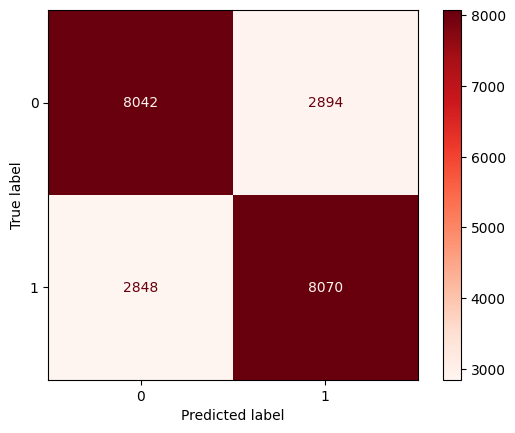

In [ ]:
print(classification_report(y_test, lr_prediction))
ConfusionMatrixDisplay.from_predictions(y_test, lr_prediction, cmap='Reds')
plt.grid(False)

Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)
gnb_prediction = gnb.predict(X_test)

              precision    recall  f1-score   support

           0       0.86      0.48      0.61     10936
           1       0.64      0.92      0.75     10918

    accuracy                           0.70     21854
   macro avg       0.75      0.70      0.68     21854
weighted avg       0.75      0.70      0.68     21854



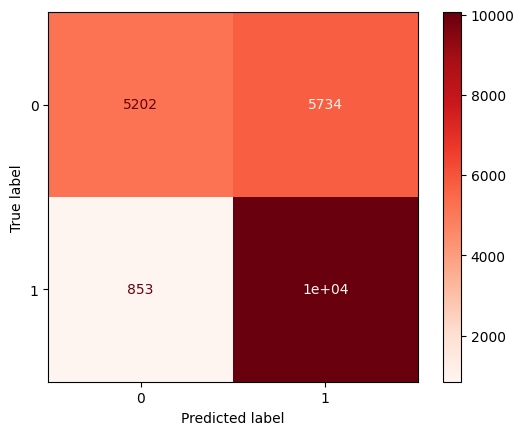

In [ ]:
print(classification_report(y_test, gnb_prediction))
ConfusionMatrixDisplay.from_predictions(y_test, gnb_prediction, cmap='Reds')
plt.grid(False)

Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=0)
clf.fit(X_train, y_train)
clf_prediction = clf.predict(X_test)

              precision    recall  f1-score   support

           0       0.90      0.88      0.89     10936
           1       0.88      0.90      0.89     10918

    accuracy                           0.89     21854
   macro avg       0.89      0.89      0.89     21854
weighted avg       0.89      0.89      0.89     21854



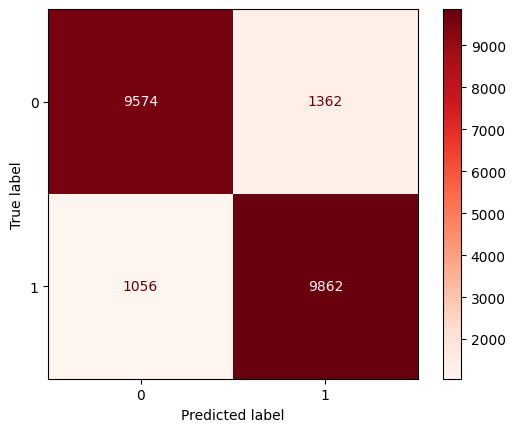

In [ ]:
print(classification_report(y_test, clf_prediction))
ConfusionMatrixDisplay.from_predictions(y_test, clf_prediction, cmap='Reds')
plt.grid(False)

Support Vector Machine

In [ ]:
from sklearn import svm

clf = svm.SVC()
clf.fit(X_train, y_train)
svm_prediction = clf.predict(X_test)

              precision    recall  f1-score   support

           0       0.57      0.52      0.54     10936
           1       0.56      0.60      0.58     10918

    accuracy                           0.56     21854
   macro avg       0.56      0.56      0.56     21854
weighted avg       0.56      0.56      0.56     21854



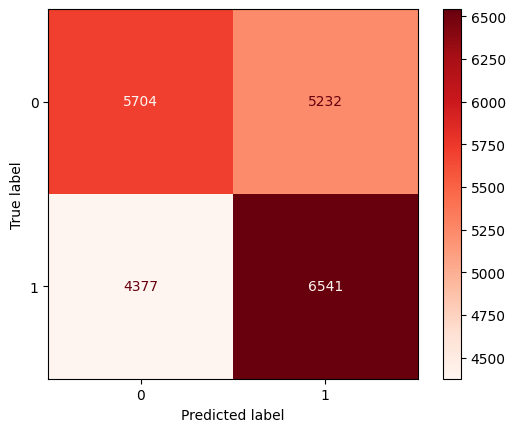

In [ ]:
print(classification_report(y_test, svm_prediction))
ConfusionMatrixDisplay.from_predictions(y_test, svm_prediction, cmap='Reds')
plt.grid(False)

K-Nearest Neighbors (KNN)

The highest recall score is 98.27807290712585 at n_neighbors = 5


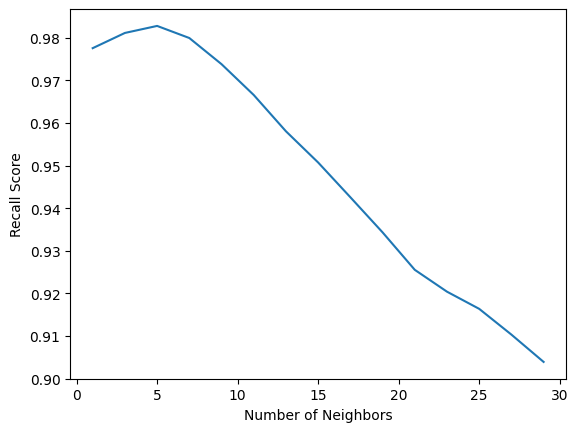

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
k_range = range(1, 30, 2)
knn_scores = {}
knn_scores_list =  []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    knn_scores[k] = metrics.recall_score(y_test, y_pred)
    knn_scores_list.append(metrics.recall_score(y_test, y_pred))

best_accuracy = max(knn_scores.values())
best_k = min(k for k, v in knn_scores.items() if v == best_accuracy)
print(f'The highest recall score is {best_accuracy*100} at n_neighbors = {best_k}')

plt.plot(k_range, knn_scores_list)
plt.xlabel('Number of Neighbors')
plt.ylabel('Recall Score')
plt.show()

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
KN= KNeighborsClassifier(n_neighbors = 5)
KN.fit(X_train, y_train)
KN_predictions = KN.predict(X_test)

              precision    recall  f1-score   support

           0       0.98      0.68      0.80     10936
           1       0.75      0.98      0.85     10918

    accuracy                           0.83     21854
   macro avg       0.86      0.83      0.83     21854
weighted avg       0.87      0.83      0.83     21854



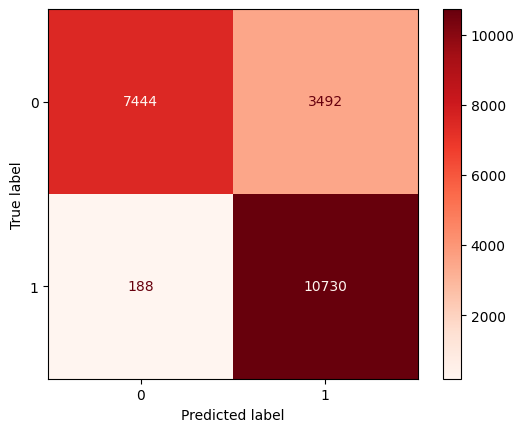

In [ ]:
print(classification_report(y_test, KN_predictions))
ConfusionMatrixDisplay.from_predictions(y_test, KN_predictions, cmap='Reds')
plt.grid(False)

Adaboost

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
Ada = AdaBoostClassifier()
Ada.fit(X_train, y_train)
Ada_predictions = Ada.predict(X_test)

              precision    recall  f1-score   support

           0       0.87      0.91      0.89     10936
           1       0.91      0.86      0.88     10918

    accuracy                           0.88     21854
   macro avg       0.89      0.88      0.88     21854
weighted avg       0.89      0.88      0.88     21854



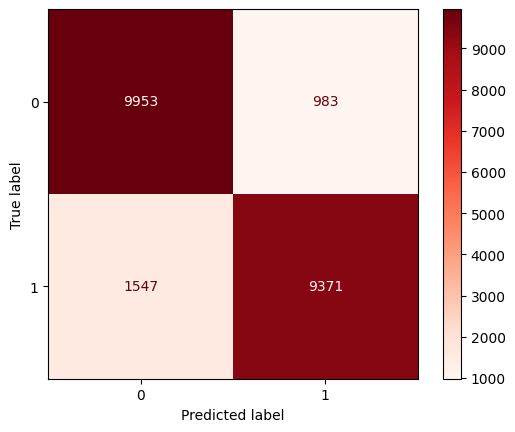

In [ ]:
print(classification_report(y_test, Ada_predictions))
ConfusionMatrixDisplay.from_predictions(y_test, Ada_predictions, cmap='Reds')
plt.grid(False)

Random Forest

In [ ]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
rf_prediction = rf.predict(X_test)

              precision    recall  f1-score   support

           0       0.91      0.99      0.95     10936
           1       0.99      0.90      0.94     10918

    accuracy                           0.95     21854
   macro avg       0.95      0.95      0.95     21854
weighted avg       0.95      0.95      0.95     21854



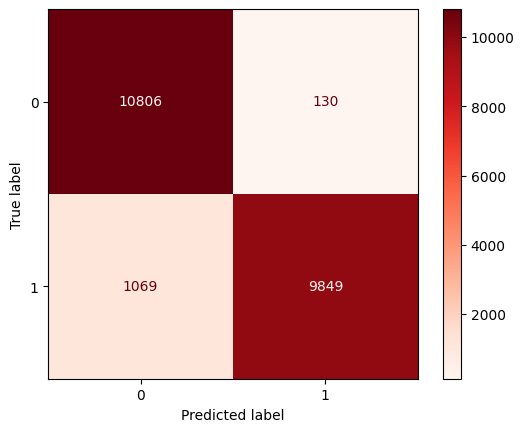

In [ ]:
print(classification_report(y_test, rf_prediction))
ConfusionMatrixDisplay.from_predictions(y_test, rf_prediction, cmap='Reds')
plt.grid(False)

In [ ]:
X_train.age = X_train.age.astype(int)
X_train['age|number_diagnoses'] = X_train['age|number_diagnoses'].astype(int)

X_test.age = X_test.age.astype(int)
X_test['age|number_diagnoses'] = X_test['age|number_diagnoses'].astype(int)

XGBoost

In [ ]:
import xgboost
xgb =  xgboost.XGBClassifier()
xgb.fit(X_train, y_train)
xgb_prediction = xgb.predict(X_test)

              precision    recall  f1-score   support

           0       0.91      1.00      0.95     10936
           1       1.00      0.90      0.95     10918

    accuracy                           0.95     21854
   macro avg       0.95      0.95      0.95     21854
weighted avg       0.95      0.95      0.95     21854



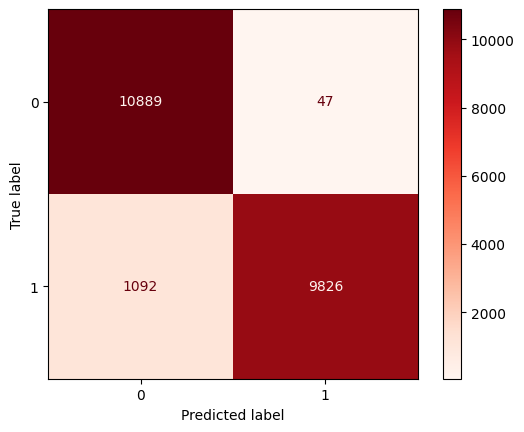

In [ ]:
print(classification_report(y_test, xgb_prediction))
ConfusionMatrixDisplay.from_predictions(y_test, xgb_prediction, cmap='Reds')
plt.grid(False)

grid search for xgboost

In [ ]:
parameters = {
    'max_depth': range(3, 10, 2),  # Tree depth controls model complexity
    'n_estimators': range(100, 301, 50),  # Number of trees in the ensemble
    'learning_rate': [0.1, 0.01, 0.05] # Step size for gradient descent

}

grid_search = GridSearchCV(estimator=xgb, param_grid=parameters, scoring='recall', cv=5, verbose=2, n_jobs=-1)  # Adjust scoring for regression if needed
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_

print("Best parameters:", best_params)

Fitting 5 folds for each of 60 candidates, totalling 300 fits
Best parameters: {'learning_rate': 0.1, 'max_depth': 9, 'n_estimators': 300}


In [ ]:
import xgboost
xgb =  xgboost.XGBClassifier(max_depth=9, n_estimators=300, learning_rate=0.05)
xgb.fit(X_train, y_train)
xgb_prediction = xgb.predict(X_test)

              precision    recall  f1-score   support

           0       0.91      1.00      0.95     10936
           1       1.00      0.90      0.95     10918

    accuracy                           0.95     21854
   macro avg       0.95      0.95      0.95     21854
weighted avg       0.95      0.95      0.95     21854



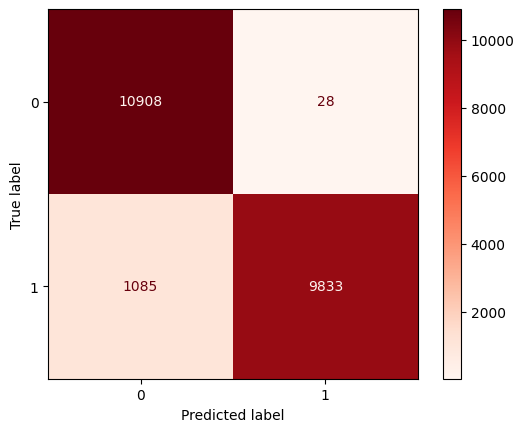

In [ ]:
print(classification_report(y_test, xgb_prediction))
ConfusionMatrixDisplay.from_predictions(y_test, xgb_prediction, cmap='Reds')
plt.grid(False)

In [ ]:
!pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 7.7 MB/s eta 0:00:00


In [ ]:
from catboost import CatBoostClassifier
catboost= CatBoostClassifier(verbose=False)
catboost.fit(X_train, y_train)
catboost_predictions = catboost.predict(X_test)

              precision    recall  f1-score   support

           0       0.91      1.00      0.95     10936
           1       1.00      0.90      0.95     10918

    accuracy                           0.95     21854
   macro avg       0.95      0.95      0.95     21854
weighted avg       0.95      0.95      0.95     21854



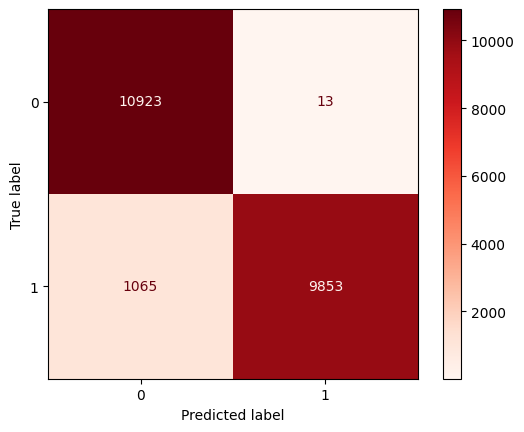

In [ ]:
print(classification_report(y_test, catboost_predictions))
ConfusionMatrixDisplay.from_predictions(y_test, catboost_predictions, cmap='Reds')
plt.grid(False)

grid search for catboost

In [ ]:
parameters = {
    'iterations': [300, 400, 500],  # Number of boosting iterations
    'depth': [7, 8, 9,10],  # Tree depth
    'learning_rate': [0.03, 0.1, 0.01, 0.2],  # Step size for gradient descent
}

grid_search = GridSearchCV(estimator=catboost, param_grid=parameters, scoring='f1_macro', cv=5, n_jobs=-1)  # Adjust scoring for regression if needed
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_

print("Best parameters:", best_params)

Best parameters: {'depth': 10, 'iterations': 500, 'learning_rate': 0.1}


In [ ]:
catboost= CatBoostClassifier(verbose=False, iterations=450, depth=10, learning_rate=0.1)
catboost.fit(X_train, y_train)
catboost_predictions = catboost.predict(X_test)

              precision    recall  f1-score   support

           0       0.91      1.00      0.95     10936
           1       1.00      0.90      0.95     10918

    accuracy                           0.95     21854
   macro avg       0.95      0.95      0.95     21854
weighted avg       0.95      0.95      0.95     21854



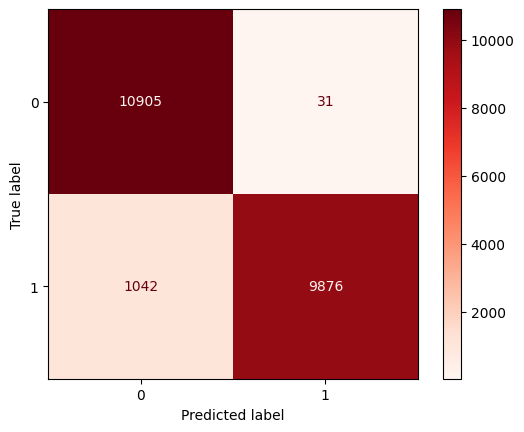

In [ ]:
print(classification_report(y_test, catboost_predictions))
ConfusionMatrixDisplay.from_predictions(y_test, catboost_predictions, cmap='Reds')
plt.grid(False)

feature selection for catboost

In [ ]:
from sklearn.feature_selection import RFECV
rfecv = RFECV(estimator=catboost, cv=5, scoring='f1_macro')
rfecv.fit(X_train, y_train)
X_train_rfe = X_train.iloc[:, rfecv.support_]
X_test_rfe = X_test.iloc[:, rfecv.support_]

              precision    recall  f1-score   support

           0       0.91      1.00      0.95     10936
           1       1.00      0.90      0.95     10918

    accuracy                           0.95     21854
   macro avg       0.95      0.95      0.95     21854
weighted avg       0.95      0.95      0.95     21854



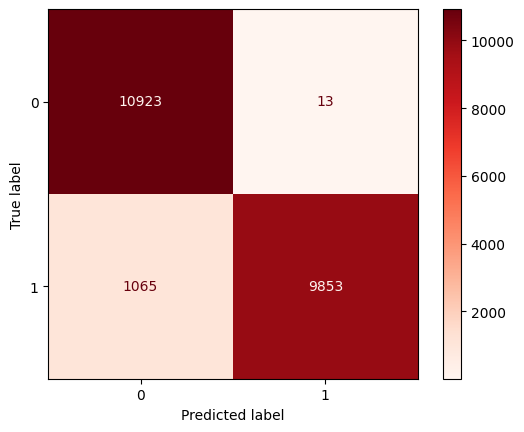

In [ ]:
catboost= CatBoostClassifier(verbose=False)
catboost.fit(X_train_rfe, y_train)
catboost_predictions = catboost.predict(X_test_rfe)
print(classification_report(y_test, catboost_predictions))
ConfusionMatrixDisplay.from_predictions(y_test, catboost_predictions, cmap='Reds')
plt.grid(False)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Learning rate set to 0.069501
0:	learn: 0.6693804	total: 31ms	remaining: 30.9s
1:	learn: 0.6408348	total: 75.6ms	remaining: 37.7s
2:	learn: 0.6169921	total: 107ms	remaining: 35.6s
3:	learn: 0.5955850	total: 134ms	remaining: 33.4s
4:	learn: 0.5607616	total: 163ms	remaining: 32.4s
5:	learn: 0.5442504	total: 199ms	remaining: 33s
6:	learn: 0.5323583	total: 227ms	remaining: 32.2s
7:	learn: 0.5189636	total: 256ms	remaining: 31.8s
8:	learn: 0.5070412	total: 285ms	remaining: 31.3s
9:	learn: 0.4986776	total: 312ms	remaining: 30.9s
10:	learn: 0.4822597	total: 340ms	remaining: 30.5s
11:	learn: 0.4521683	total: 370ms	remaining: 30.5s
12:	learn: 0.4468054	total: 404ms	remaining: 30.7s
13:	learn: 0.4303034	total: 430ms	remaining: 30.3s
14:	learn: 0.4227937	total: 464ms	remaining: 30.5s
15:	learn: 0.4160995	total: 495ms	remaining: 30.4s
16:	learn: 0.4091052	total: 527ms	remaining: 30.5s
17:	learn: 0.4032460	total: 555ms	remaining: 30.3s
18:	learn: 0.3934024	total: 585ms	remaining: 30.2s
19:	learn: 0.

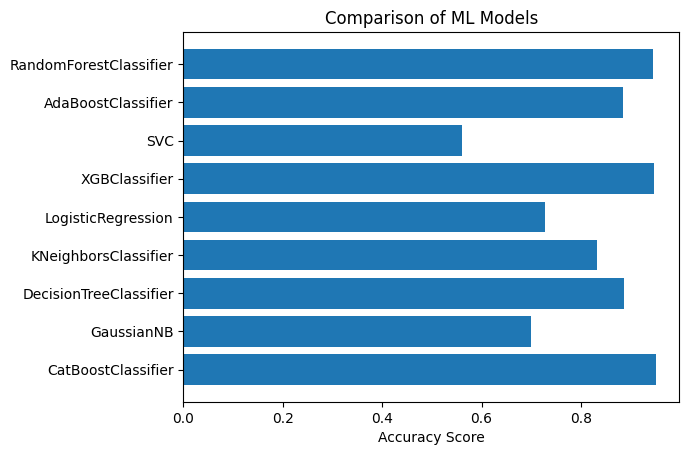

In [ ]:
# Define a list of classifiers
classifiers = [
    RandomForestClassifier(random_state=42),
    AdaBoostClassifier(),
    svm.SVC(),
    xgboost.XGBClassifier(),
    LogisticRegression(),
    KNeighborsClassifier(),
    DecisionTreeClassifier(random_state=0),
    GaussianNB(),
    CatBoostClassifier()
]

# Train and evaluate each classifier
accuracy_scores = []

for classifier in classifiers:
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)

# Plotting the results
fig, ax = plt.subplots()
ax.barh(range(len(classifiers)), accuracy_scores, align='center')
ax.set_yticks(range(len(classifiers)))
ax.set_yticklabels([classifier.__class__.__name__ for classifier in classifiers])
ax.invert_yaxis()  # Higher accuracy should be at the top
ax.set_xlabel('Accuracy Score')
ax.set_title('Comparison of ML Models')
plt.show()